Proyecto 1: aprendizaje supervisado (TC2034.300)

a00517244 Camila Navarro

A01197399 Diana Cadena

A01705747 Enrique García

## Contexto del dataset
El dataset que se está tomando en consideración para la realización de los proyectos de la materia tiene como nombre UCI ML Drug Review dataset. Como tal, se encuentran dos archivos csv, uno con datos para entrenamiento y otro para las pruebas. Este dataset es referente a la satisfacción de lxs pacientes en cuanto a medicamentos recetados, tomando en consideración el padecimiento presentado por lxs mismxs. Dentro de este dataset, se pueden hacer distintas correlaciones: padecimiento vs. medicamento y reseña vs. nivel de satisfacción

# Pasos iniciales

##  Carga de datos y descripción básica
Importar datos

In [1]:
#librerías básicas
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

#ml
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.concat(
    map(pd.read_csv, ['/content/drive/Shareddrives/Inteligencia Artificial/drugsComTest_raw.csv','/content/drive/Shareddrives/Inteligencia Artificial/drugsComTrain_raw.csv']), ignore_index=True)

In [2]:
# por si se esta trabajando fuera de google colab
df = pd.concat(
    map(pd.read_csv, ['drugsComTest_raw.csv','drugsComTrain_raw.csv']), ignore_index=True)

In [ ]:
df.head()

,uniqueID,drugName,condition,review,rating,date,usefulCount
0,163740,Mirtazapine,Depression,"""I&#039;ve tried a few antidepressants over th...",10,28-Feb-12,22
1,206473,Mesalamine,"Crohn's Disease, Maintenance","""My son has Crohn&#039;s disease and has done ...",8,17-May-09,17
2,159672,Bactrim,Urinary Tract Infection,"""Quick reduction of symptoms""",9,29-Sep-17,3
3,39293,Contrave,Weight Loss,"""Contrave combines drugs that were used for al...",9,5-Mar-17,35
4,97768,Cyclafem 1 / 35,Birth Control,"""I have been on this birth control for one cyc...",9,22-Oct-15,4


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215063 entries, 0 to 215062
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   uniqueID     215063 non-null  int64 
 1   drugName     215063 non-null  object
 2   condition    213869 non-null  object
 3   review       215063 non-null  object
 4   rating       215063 non-null  int64 
 5   date         215063 non-null  object
 6   usefulCount  215063 non-null  int64 
dtypes: int64(3), object(4)
memory usage: 11.5+ MB


In [ ]:
#total de las clases de los atributos
print('Total de medicamentos: ',df.drugName.nunique())
print('Total de tipo de condición médica: ',df.condition.nunique())

Total de medicamentos:  3671
Total de tipo de condición médica:  916


### Descripción de las clases
Son siete entre las cuales se encuentran:
* uniqueID: Identificador de paciente
* drugName: Nombre del medicamento recetado; cuenta con 3,671 registros únicos. Es nuestra variable **objetivo** predecir.
* condition: Nombre del padecimiento reportado; cuenta con 916 registros únicos. Es de gran utilidad para el proceso de aprendizaje y correlación.
* review: Comentarios acerca de cómo fue su experiencia con el medicamento, por qué fue recetado y sobre el cambio que notaron al haberlo tomado.
* rating: Calificación otorgada 1-10 al medicamento; esta es dada por los pacientes complementando así el review de lo que observaron al haberlo tomado.
* date: Fecha en la que se escribió la reseña.
* usefulCount: Cantidad de usuarios que encontraron útil la reseña, siendo un número basado en sí la reseña les fue útil o no y la frecuencia de los resultados afirmativos.

En total hay 7 columnas y 21,097 filas. De estas, la única columna con valores nulos es "condition" con 1209 entradas nulas.

Las variables categóricas son:

* uniqueID
* drugName
* condition
* review
* date

Las cuantitativas son:

* rating
* usefulCount

### Contenido de las clases relevantes 

Primero que nada, revisamos si el dataset contiene datos nulos. Se encontraron 1194 filas nulas en la variable Condition. Esto significa que hay ciertos medicamentos sin descripción de la condición del paciente, los cuales no aportarán información al análisis. 

In [ ]:
df.isnull().sum()

uniqueID          0
drugName          0
condition      1194
review            0
rating            0
date              0
usefulCount       0
dtype: int64

In [ ]:
drugNoCond = df[df.condition.isnull()].drugName.unique()
print('Medicamentos sin descripción de la condición: ',len(drugNoCond))

Medicamentos sin descripción de la condición:  296


Verificamos también si hay medicamentos que se hayan usado para múltiples condiciones.

In [ ]:
# Medicamentos para múltiples condiciones
print('Promedio de condiciones por medicamento')
df.groupby('drugName').condition.nunique().mean()

Promedio de condiciones por medicamento


2.5731408335603376

In [ ]:
print('Máximo de condiciones por medicamento')
df.groupby('drugName').condition.nunique().max()

Máximo de condiciones por medicamento


39

Verificamos el número de medicamentos que pueden corresponder a una sola condición.

In [ ]:
print('Promedio de medicamentos por condición: ',df.groupby('condition').drugName.nunique().mean())

print('\n20 condiciones con más medicamentos listados')
df.groupby('condition').drugName.nunique().sort_values(ascending = False).head(20)

Promedio de medicamentos por condición:  10.312227074235809

20 condiciones con más medicamentos listados


condition
Not Listed / Othe                             253
Pain                                          219
Birth Control                                 181
High Blood Pressure                           146
Acne                                          127
Depression                                    115
Rheumatoid Arthritis                          107
Diabetes, Type 2                               97
Allergic Rhinitis                              95
Insomnia                                       85
Osteoarthritis                                 84
Bipolar Disorde                                82
Anxiety                                        81
Abnormal Uterine Bleeding                      77
Endometriosis                                  64
3</span> users found this comment helpful.     62
Psoriasis                                      61
Migraine                                       60
ADHD                                           58
4</span> users found this comment helpfu

Por lo que vemos, algunas de las condiciones con más medicamentos no están listadas o son erróneas (contienen el mensaje "X<<//span>> users found this comment helpful."). Además, anteriormente habíamos visto datos faltantes. Por tanto se tendrá que realizar una limpieza de los datos.

## Limpieza

In [ ]:
# Eliminamos las 11944 filas que contienen datos nulos en la columna Condition
df = df[~df.condition.isnull()]

In [ ]:
# Porcentaje de los valores que tienen caracteres especiales (errores)

print('Porcentaje de texto con errores en Condition: ', df[(~df.condition.str.isalnum())&(~df.condition.str.contains('/| |-|,'))].\
                                              shape[0]/df.shape[0])
print('Porcentaje de texto con errores en Drug Name: ', df[(~df.drugName.str.isalnum())&(~df.drugName.str.contains('/| |-|,'))].\
                                              shape[0]/df.shape[0])

Porcentaje de texto con errores en Condition:  0.0008089063866198467
Porcentaje de texto con errores en Drug Name:  0.0


In [ ]:
print('Porcentaje del mensaje "NOT LISTED" en Condition: ', df[df.condition=="Not Listed / Othe"].shape[0]/df.shape[0])

Porcentaje del mensaje "NOT LISTED" en Condition:  0.002768049600456354


En suma, estos errores conforman alrededor del 2% de la informació, por lo que no repressntan una cantidad que al borrarse perjudique a nuestro dataset. Por tanto, eliminamos los errores encontrados.

In [ ]:
# Eliminamos las filas de condiciones no listadas
df = df[df.condition!="Not Listed / Othe"]

In [ ]:
# Eliminamos las filas de condiciones con errores (caracteres especiales)

df = df[~df.condition.str.contains('\<|\?|\)|\(')]

Además de eliminar aquellas filas con errores decidimos no tomar en cuenta aquellas con medicamentos que aparezcan poco en el dataset. Nuestro objetivo es poder predecir el medicamento más recomendable en base a la condición y su calificació, pero medicamentos que solo tengan un par de instancias no tendrán mucha utilidad y harán ruido al realizar nuestras predicciones.

In [ ]:
# Estado del dataset original

print('Número actual de medicamentos en el dataset: ', df['drugName'].nunique())
print('Dimensiones del dataset actual: ', df.shape)

Número actual de medicamentos en el dataset:  3635
Dimensiones del dataset actual:  (211755, 7)


In [ ]:
# Eliminamos aquellas que no tengan por lo menos 5 instancias

df = df[df.groupby('drugName').drugName.transform('count') > 4]
df.shape

(208704, 7)

In [ ]:
# Estado del dataset nuevo

print('Número nuevo de medicamentos en el dataset: ', df['drugName'].nunique())
print('Dimensiones del dataset nuevo: ', df.shape)

Número nuevo de medicamentos en el dataset:  2016
Dimensiones del dataset nuevo:  (208704, 7)


## Visualización y exploración

In [ ]:
#------------------------------Lo tenemos que cambiar por frecuencia y no por los que tengan más reviews
#Top 10 reviewed & rated drugs
top_RatingDrugs = df.groupby('drugName').agg({'rating':['count','mean']}).reset_index()
top_RatingDrugs.columns = ['drugName','rating_count','rating_mean']
top_reviewed = top_RatingDrugs.sort_values(by = 'rating_count').tail(10)
top_rated = top_RatingDrugs[top_RatingDrugs.rating_count>50].sort_values(by = ['rating_mean']).tail(10)

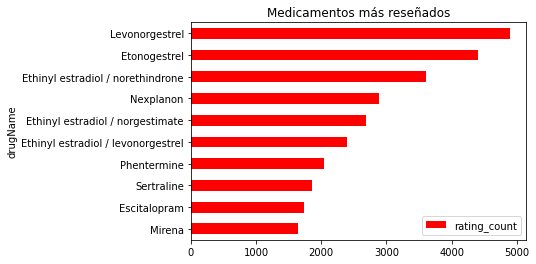

In [ ]:
top_reviewed.plot(kind='barh',y='rating_count',x='drugName',color='r',\
                 title = 'Medicamentos más reseñados');

In [3]:
from collections import Counter
counts = Counter(df['drugName'])
counts.most_common(10)


[('Levonorgestrel', 4930),
 ('Etonogestrel', 4421),
 ('Ethinyl estradiol / norethindrone', 3753),
 ('Nexplanon', 2892),
 ('Ethinyl estradiol / norgestimate', 2790),
 ('Ethinyl estradiol / levonorgestrel', 2503),
 ('Phentermine', 2085),
 ('Sertraline', 1868),
 ('Escitalopram', 1747),
 ('Mirena', 1673)]

In [ ]:
#Obtener los medicamentos más repedidos
top_drugs = df.groupby('drugName').agg({'drugName':['count']}).reset_index()
top_drugs.columns = ['drugName', 'frecuencia']
top_drugs = top_drugs.sort_values(by = 'frecuencia', ascending = False)
top_drugs = top_drugs[top_drugs.frecuencia>1000]
top_drugs = top_drugs.reset_index()

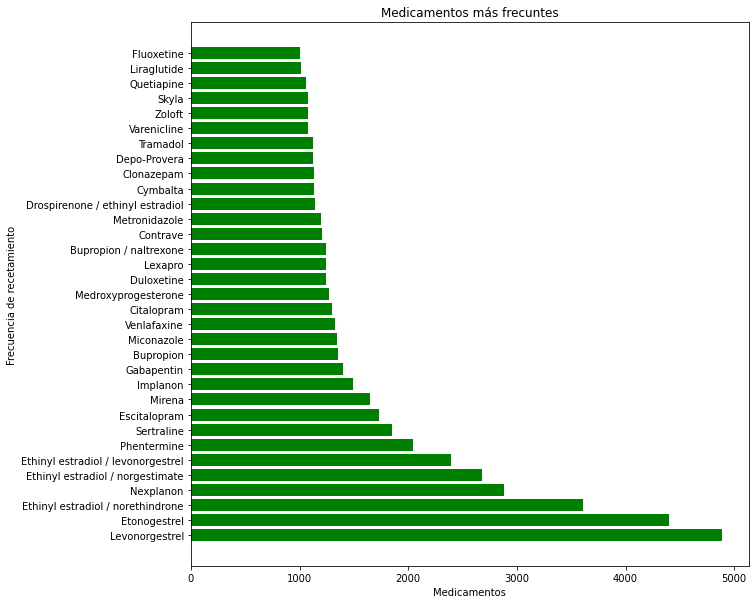

In [ ]:
plt.figure(figsize = (10,10))
plt.barh(top_drugs['drugName'], top_drugs.frecuencia, color= 'g')
plt.xlabel('Medicamentos')
plt.ylabel('Frecuencia de recetamiento')
plt.title('Medicamentos más frecuntes')
plt.show()


In [ ]:
df['drugName'].value_counts()
drugs = df.groupby(['drugName']).count()

drugs.shape

(2016, 6)

In [ ]:
top_drugs = drugs[df['drugName'].value_counts()>100].sort_values(by ='drugName')

top_drugs.shape

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


(420, 6)

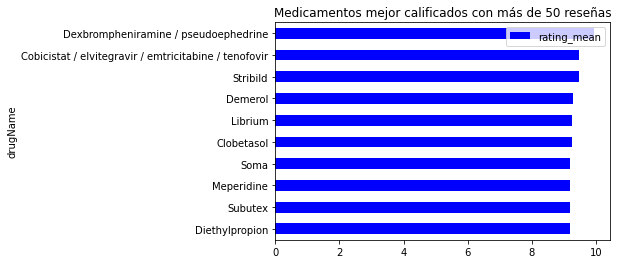

In [ ]:
top_rated.plot(kind='barh',y='rating_mean',x='drugName',color='b',\
              title = 'Medicamentos mejor calificados con más de 50 reseñas');

In [ ]:
#mismo caso con más frecuencia en condiciones o incluso con más medicamentos asignados
#Top 10 reviewed & rated conditions
top_cond = df.groupby('condition').agg({'rating':['count','mean']}).reset_index()
top_cond.columns = ['condition','rating_count','rating_mean']
top_reviewed_cond = top_cond.sort_values(by = 'rating_count').tail(10)
top_rated_cond = top_cond[top_cond.rating_count>50].sort_values(by = ['rating_mean']).tail(10)

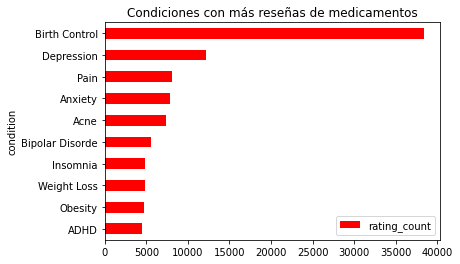

In [ ]:
top_reviewed_cond.plot(kind='barh',y='rating_count',x='condition',color='r',\
                 title = 'Condiciones con más reseñas de medicamentos');

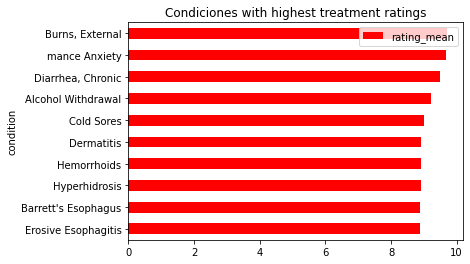

In [ ]:
top_rated_cond.plot(kind='barh',y='rating_mean',x='condition',color='r',\
                 title = 'Condiciones with highest treatment ratings');

In [ ]:
#frecuencia de rating positivo, negativo  o nulo
df.loc[df.rating<4,'rating_group']  = '-1'
df.loc[df.rating.between(4,8),'rating_group']  = '0'
df.loc[df.rating>=8,'rating_group']  = '1'


df.groupby('rating_group').review.count()/df.shape[0]

rating_group
-1    0.219129
0     0.179024
1     0.601848
Name: review, dtype: float64

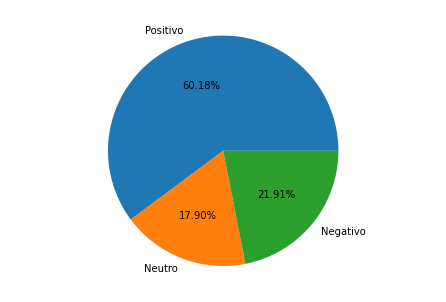

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
langs = ['Positivo', 'Neutro', 'Negativo']
students = [(df[df.rating_group == '1'].review.count()/df.shape[0])*100, 
         (df[df.rating_group == '0'].review.count()/df.shape[0])*100,
         (df[df.rating_group == '-1'].review.count()/df.shape[0])*100]
ax.pie(students, labels = langs,autopct='%1.2f%%')
plt.show()

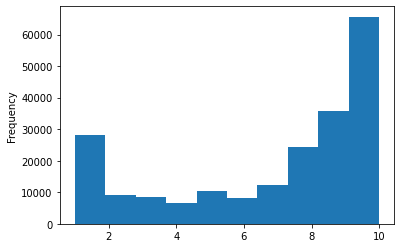

In [ ]:
#histiograma de rating
df.rating.plot(kind = 'hist');

In [ ]:
# Mostrar valores de correlación (hint: corr)
df.corr()

,uniqueID,rating,usefulCount
uniqueID,1.000000,0.016614,0.018498
rating,0.016614,1.000000,0.238812
usefulCount,0.018498,0.238812,1.000000


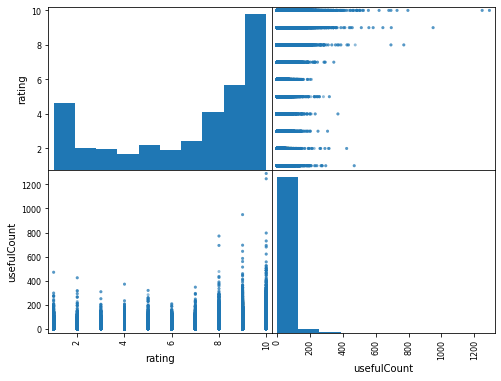

In [ ]:
# Mostrar scatter_matrix (hint: scatter_matrix)
from pandas.plotting import scatter_matrix
attributes = ["rating", "usefulCount"]
scatter_matrix(df[attributes], figsize=(8,6))
plt.show()

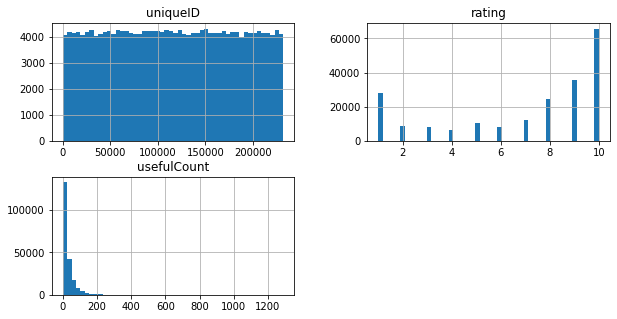

In [ ]:
df.hist(bins=50, figsize=(10,5))
plt.show()

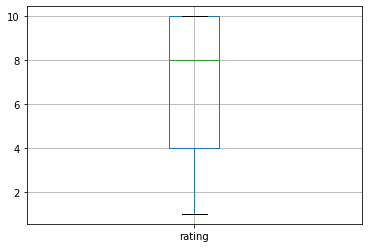

In [ ]:
df.drop(['uniqueID','usefulCount'], axis=1).boxplot()
plt.show()

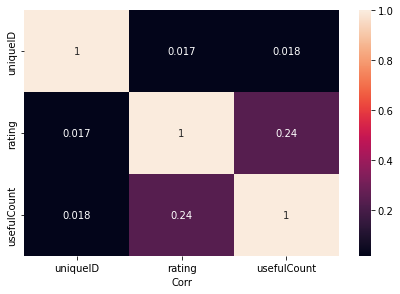

In [ ]:
figure = plt.figure()
sns.heatmap(df.corr(), annot=True)
plt.tight_layout()
plt.xlabel('Corr')
plt.show()

## Paso 4: Preparación del dataset

Al tener datos cualitativos, estos tienen que ser procesados para poder ingresarlos a los algortimos de predicción. Por tanto, tenemos que asignar una etiqueta en forma de número a cada clase. Al tener más de 2000 clases, utilizamos la herramienta de LabelEncoder para automatizar ese proceso.



In [ ]:
label_encoder = preprocessing.LabelEncoder()

In [ ]:
#transformación de variables categóricas
df['drugName'] = label_encoder.fit_transform(df.drugName)
df['condition'] = label_encoder.fit_transform(df.condition)

In [ ]:
#split data into test and train
X = df[['rating', 'condition']]
y = df['drugName']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 33)

In [ ]:
#datos escalados
X_e = df[['rating', 'condition']]
y_e = df['drugName']

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_e)
X_e = scaler.transform(X_e)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_e, y_e, test_size=0.3, random_state = 33)

# Modelos supervisados

### Clasificador K Vecinos más cercanos

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

params = {'n_neighbors':[2,3,4,5,6,7,8,9],'weights':['uniform','distance'], 'p':[1,2]}

knn = KNeighborsClassifier()

model = GridSearchCV(knn, params, cv=5)
model.fit(X_train,y_train.ravel())
model.best_params_

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  UserWarning,


KeyboardInterrupt: ignored

In [ ]:
knn = KNeighborsClassifier(n_neighbors=9, weights='distance', p=1)
knn.fit(X_train, y_train.ravel())

In [ ]:
# Realizar predicciones a partir del test set.
Y_pred = knn.predict(X_test)

*Métricas*

In [ ]:
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test, Y_pred)
# Mostramos los valores numéricos de la matriz de confusión
conf_matrix

In [ ]:
# Da resultados TERRIBLEES TnT 
from sklearn.metrics import classification_report

report = classification_report(y_test, Y_pred, output_dict=True, zero_division=True)

results = pd.DataFrame(report).transpose()
results.tail(3)

In [ ]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(knn, X_train, y_train.ravel(), cv=5, scoring="accuracy")
final_score = sum(scores) / len(scores)
print("La precisión usando validación cruzada es:", final_score*100,"%")

### Redes Neruonales

In [ ]:
!pip install scikit-neuralnetwork

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 33)

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler

In [ ]:
nn = MLPClassifier(activation='relu', solver='adam', learning_rate='adaptive', max_iter=100)
nn.fit(X_train, y_train.ravel())

Y_pred = nn.predict(X_test)

print(nn.score(X_test, y_test))

In [ ]:
report = classification_report(y_test, y_pred, output_dict=True, zero_division=True)

results = pd.DataFrame(report).transpose()
results.tail(3)

In [ ]:
scores = cross_val_score(knn, X_train, y_train.ravel(), cv=5, scoring="accuracy")
final_score = sum(scores) / len(scores)
print("La precisión usando validación cruzada es:", final_score*100,"%")

### SVM

In [ ]:
from sklearn.svm import LinearSVC

In [ ]:
vs = LinearSVC(penalty='l2', loss='squared_hinge', multi_class='ovr', max_iter=2000)
vs.fit(X_train, y_train.ravel())

Y_pred = vs.predict(X_test)

In [ ]:
report = classification_report(y_test, y_pred, output_dict=True, zero_division=True)

results = pd.DataFrame(report).transpose()
results.tail(3)

In [ ]:
scores = cross_val_score(knn, X_train, y_train.ravel(), cv=5, scoring="accuracy")
final_score = sum(scores) / len(scores)
print("La precisión usando validación cruzada es:", final_score*100,"%")

# Modelo No supervisado

### K-means

In [ ]:
import nltk
import tqdm as tqdm
import string
from nltk.corpus import stopwords
#stop = stopwords.words("english")

import datetime as dt

from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
#from sklearn.cross_validation import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from nltk.stem.porter import PorterStemmer
english_stemmer=nltk.stem.SnowballStemmer('english')

from gensim import summarization
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from math import floor,ceil

from keras.models import Sequential
from keras.layers import LSTM, Dense, Embedding

import re
import nltk
from nltk.corpus import stopwords
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


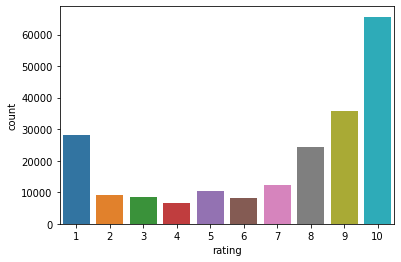

In [ ]:
sns.countplot(df['rating'])

In [ ]:
df = df[['drugName', 'review', 'rating']]

In [ ]:
stops = set(stopwords.words('english'))
print(stops)

{'those', 'on', 'him', 's', 'itself', 'having', 'into', "isn't", 'yours', "didn't", 'he', 'a', 'in', 'its', 'all', 'for', "mightn't", 'don', 'i', 'these', 'and', 'doing', 'how', 'your', 'have', 'mightn', 'an', 'their', 'should', 'my', "don't", 'needn', "it's", 'but', 'own', "wouldn't", 'whom', "wasn't", 'hasn', 'once', 'just', 'd', 'theirs', "weren't", 'or', 'from', "she's", 'too', 'haven', "couldn't", 'until', 'y', 'by', 'our', 'she', 'had', 'with', 'what', 'through', 'off', 're', 'out', 'you', 'to', 'there', 'after', 'ma', 'few', "you'll", 'aren', 'both', 'about', 'why', 'weren', 'hers', 'more', 'ain', "doesn't", 'as', 'his', 'can', "needn't", 'under', "that'll", 'they', 'am', 'than', 'this', "mustn't", 'shouldn', 'shan', 'some', 'was', "you've", "shan't", 'up', 'll', 'where', 'who', 'mustn', 't', 'below', 'hadn', 'them', 'himself', 'here', 'yourself', 'is', 'very', "aren't", 'nor', 'myself', "you're", 'ours', 'if', 'ourselves', "should've", 'now', 'it', 'do', 'her', 'did', 'will', "

In [ ]:
text = df.review[0]
text = text.lower()
text = re.sub("&#039;", "'", text)
text_encode = text.encode(encoding="ascii", errors="ignore")
text_decode = text_encode.decode()
text = re.sub("https?:\/\/.*[\r\n]*", "", text)
text = re.sub("#", "", text)
punct = set(string.punctuation) 
text = "".join([ch for ch in text if ch not in punct])


stops = set(stopwords.words("english"))
text = [w for w in text if not w in stops]

text = ''.join(text)
text


've re  few nepren ver he er clpr fluxene rplne bu nne f he helpe wh  epren nn p nxe  cr uggee n chnge e n 45g rzpne n h ecne h ve  lfe hnkfull  hve h n e effec epecll he  cn  wegh gn ve cull l l f wegh  ll hve ucl hugh bu rzpne h ve e'

In [ ]:
import re
from nltk.stem import WordNetLemmatizer

def limpieza(text, remove_stopwords=False):
  text = text.lower()
  # Remover error de '
  text = re.sub("&#039;", "'", text)
  # Eliminar símbolos en ASCII (emojis, caracteres especiales, etc.)
  text_encode = text.encode(encoding="ascii", errors="ignore")
  text_decode = text_encode.decode()
  text = " ".join([word for word in text_decode.split()])
  # Remover URLs
  text = re.sub("https?:\/\/.*[\r\n]*", "", text)
  # Remover hashtags
  text = re.sub("#", "", text)
  # Remover puntuacion
  punct = set(string.punctuation) 
  text = "".join([ch for ch in text if ch not in punct])

  if remove_stopwords:
    stops = set(stopwords.words("english"))
    text = "".join([word for word in text if word not in stops])
  b=[]
  lemmatizer = WordNetLemmatizer()
  text = text.split()
  for word in text:
    b.append(lemmatizer.lemmatize(word))
  
  return b

In [ ]:
test='"I&#039;ve tried a few antidepressants over many years'
limpieza(test)

LookupError: ignored

In [ ]:
data = df["review"]
data.head(20)

0     "I&#039;ve tried a few antidepressants over th...
1     "My son has Crohn&#039;s disease and has done ...
2                         "Quick reduction of symptoms"
3     "Contrave combines drugs that were used for al...
4     "I have been on this birth control for one cyc...
5     "4 days in on first 2 weeks.  Using on arms an...
6     "I&#039;ve had the copper coil for about 3 mon...
7     "This has been great for me. I&#039;ve been on...
8     "Ive been on Methadone for over ten years and ...
9     "I was on this pill for almost two years. It d...
10    "Holy Hell is exactly how I feel. I had been t...
11    "Honestly its day one on the 3 day treatment. ...
12    "This is a waste of money.  Did not curb my ap...
13                   "No problems, watch what you eat."
14    "Ditto on rebound sleepless when discontinued....
15    "A doctor in the ER prescribed me 200 mg of Pr...
16    "I smoked for 50+ years.  Took it for one week...
17    "So I was on Ginanvi for about 3 months be

In [ ]:
stops = set(stopwords.words('english'))
print(stops)

LookupError: ignored